# Домашнее задание 4. Конструирование текстовых признаков из твитов пользователей

## Сбор данных

Первый этап - сбор твитов пользователей. Необходимо подключаться к Twitter API и запрашивать твиты по id пользователя. 
Подключение к API подробно описано в ДЗ 1.

In [1]:
import twitter

CONSUMER_KEY = "tZhRkI5cQarNQUfMPyqDf8E3C"
CONSUMER_SECRET = "pAL7AY7Z3IshhsQd8H71AbW99ni3CkRKi9ayHhNF9ZUTFRZx4L"

ACCESS_TOKEN_KEY = "779945804337471488-qQebZWKYEC3VgyQMpSDIDm1FclVTIYr"
ACCESS_TOKEN_SECRET = "qWPX0jVHBEgeWCmK8bCO5qbmBIXYCyJx6xmwIkGf0zjlk"

api = twitter.Api(consumer_key=CONSUMER_KEY, 
                  consumer_secret=CONSUMER_SECRET, 
                  access_token_key=ACCESS_TOKEN_KEY, 
                  access_token_secret=ACCESS_TOKEN_SECRET)

Для получения твитов пользователя может быть использован метод GetUserTimeline из библиотеки python-twitter. Он позволяет получить не более 200 твитов пользователя. По каждому пользователю достаточно собрать 200 твитов.

Метод имеет ограничение по количеству запросов в секунду. Для получения информации о промежутке времени, которое необходимо подождать для повторного обращения к API может быть использован метод `GetSleepTime`. Для получения информации об ограничениях запросов с помощью метода `GetUserTimeLine` необходимо вызывать `GetSleepTime` с параметром "statuses/user_timeline".

Метод GetUserTimeline возвращает объекты типа Status. У этих объектов есть метод AsDict, который позволяет представить твит в виде словаря.

Id пользователей необходимо считать из файла, как было сделано в ДЗ 1.

Необходимо реализовать функцию `get_user_tweets(user_id)`. Входной параметр - id пользователя из файла. Возвращаемое значение - массив твитов пользователя, где каждый твит представлен в виде словаря. Предполагается, что информация о пользователе содержится в твитах, которые пользователь написал сам. Это означает, что можно попробовать отфильтровать ответы другим пользователям, ссылки и ретвиты, а так же картинки и видео, так как наша цель - найти текстовую информацию.

In [32]:
def get_user_tweets(user_id):
    """returns list of tweets as dicts"""
    try:
        statuses = api.GetUserTimeline(user_id, count = 200, include_rts=False, exclude_replies=True, trim_user=True) 
        res_statuses = []
        for status in statuses:
            res_statuses.append(status.AsDict())
    except Exception as error:
        res_statuses = []
    # your code here
    return res_statuses

## Разбор текста твита

Обработка текста предполагает разбиение текста на отдельные элементы - параграфы, предложения, слова. Мы будем преобразовывать текст твита к словам. Для этого текст необходимо разбить на слова. Сделать это можно, например, с помощью регулярного выражения.

Необходимо реализовать функцию, `get_words(text)`. Входной параметр - строка с текстом. Возвращаемое значение - массив строк (слов). Обратите внимание, что нужно учесть возможное наличие пунктуации и выделить по возможности только слова. 

In [4]:

import re
def get_words(text):
    text = text.lower()
    """returns list of words"""
    find = re.findall(r'[^\\=\-?~$%&/\[\]+><{}_^(@)*#\s!,.?":;0-9]+', text)
    return find



In [5]:
print get_words("Here are different, words =) Amigoo!")

['here', 'are', 'different', 'words', 'amigoo']


Далее полученные слова необходимо привести к нормальной форме. То есть привести их к форме единственного числа настоящего времени и пр. Сделать это можно с помощью библиотеки nltk. Информацию по загрузке, установке библиотеки и примерах использования можно найти на сайте http://www.nltk.org/

Для загрузки всех необходимых словарей можно воспользоваться методом download из библиотеки nltk.

In [6]:
import nltk

nltk.download("wordnet")
nltk.download("stopwords")


[nltk_data] Downloading package wordnet to /home/lena/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /home/lena/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


/home/lena/anaconda2/lib/python2.7/site-packages/IPython/core/formatters.py:92: DeprecationWarning: DisplayFormatter._ipython_display_formatter_default is deprecated: use @default decorator instead.
  def _ipython_display_formatter_default(self):
/home/lena/anaconda2/lib/python2.7/site-packages/IPython/core/formatters.py:98: DeprecationWarning: DisplayFormatter._formatters_default is deprecated: use @default decorator instead.
  def _formatters_default(self):
/home/lena/anaconda2/lib/python2.7/site-packages/IPython/core/formatters.py:677: DeprecationWarning: PlainTextFormatter._deferred_printers_default is deprecated: use @default decorator instead.
  def _deferred_printers_default(self):
/home/lena/anaconda2/lib/python2.7/site-packages/IPython/core/formatters.py:669: DeprecationWarning: PlainTextFormatter._singleton_printers_default is deprecated: use @default decorator instead.
  def _singleton_printers_default(self):
/home/lena/anaconda2/lib/python2.7/site-packages/IPython/core/form

True

Для дальнейшей обработки слова должны быть приведены к нижнему регистру. 

Для приведения к нормальной форме можно использовать `WordNetLemmatizer` из библиотеки nltk. У этого класса есть метод `lemmatize`.

Также необходимо убрать из текста так называемые стоп-слова. Это часто используемые слова, не несущие смысловой нагрузки для наших задач. Сделать это можно с помощью `stopwords` из nltk.corpus

Необходимо реализовать функцию `get_tokens(words)`. Входной параметр - массив слов. Возвращаемое значение - массив токенов.

In [7]:
from nltk.corpus import stopwords

from nltk.stem import WordNetLemmatizer
from nltk.stem import SnowballStemmer

wnl = WordNetLemmatizer()
list_stopwords = stopwords.words()
def get_tokens(words):
    list_tokens = [wnl.lemmatize(word) for word in words if wnl.lemmatize(word) not in list_stopwords]
    return list_tokens

In [8]:
print get_tokens(["here", "are", "different", "words"])

['different', u'word']


Необходимо реализовать функцию `get_tweet_tokens(tweet)`. Входной параметр - текст твита. Возвращаемое значение -- токены твита. 

In [9]:
def get_tweet_tokens(tweet):
    return get_tokens(get_words(tweet))

Необходимо реализовать функцию `collect_users_tokens()`. Функция должна сконструировать матрицу признаков пользователей. В этой матрице строка - пользователь. Столбец - токен. На пересечении - сколько раз токен встречается у пользователя.
Для построения матрицы можно использовать `DictVectorizer` из `sklearn.feature_extraction`.

In [26]:
def collect_users_tokens(df_users):
    """returns users list and list of user dicts. Each dict contains frequence of user tokens"""
    list_users = []
    list_dict_tokens = []
    # Noise found on tag-cloud
    list_noise = ['http', 'don\'t', 'i\'m', 'it', 'it\'s', 'amp']
    
    done = 0;
    for user in df_users.uid:
        done = done + 1
        print done
        user_tweets = get_user_tweets(user)
        dict_tokens = {}
        for tweet in user_tweets:
            list_tokens = get_tweet_tokens(tweet["text"])
            for token in list_tokens:
                if token in dict_tokens:
                    dict_tokens[token] =  dict_tokens[token] + 1
                else:
                    if len(token) > 1 and token not in list_noise:
                        dict_tokens[token] = 1
        list_users.append(user)
        list_dict_tokens.append(dict_tokens)
        
    return list_users, list_dict_tokens

In [33]:
import pandas as pd
from collections import defaultdict
import json
from sklearn.feature_extraction import DictVectorizer


TRAINING_SET_URL = "train.csv"
EXAMPLE_SET_URL = "test.csv"
df_users_train = pd.read_csv(TRAINING_SET_URL, sep=",", header=0, names=["uid", "cat"])
df_users_ex = pd.read_csv(EXAMPLE_SET_URL, sep=",", header=0, names=["uid"])
df_users_ex['cat'] = None
df_users = pd.concat([df_users_train, df_users_ex])

users, users_tokens = collect_users_tokens(df_users)
v = DictVectorizer()
vs = v.fit_transform(users_tokens)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


In [35]:
import numpy as np
np.savez("out_4.dat", data=vs, users=users, users_tokens=users_tokens )

Далее для получения представления о полученной информацию о токенах предлагается отобразить ее в виде облака тэгов. [Подсказка](http://anokhin.github.io/img/tag_cloud.png). 

In [40]:


%pylab inline
from PIL import Image
from os import path
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

def draw_tag_cloud(v, vs):
    """Draws tag cloud of found tokens"""

   # mask = np.array(Image.open(path.join("Resources", "logo.png")))

    wc = WordCloud(background_color="white", max_words=1000,  stopwords=("http"))
    
    wc.generate_from_frequencies(tokens_feq)

    wc.to_file(path.join("Output", "logo_1.png"))
    
    plt.figure(figsize = (12, 12))
    plt.imshow(wc)
    plt.axis("off")
    plt.show()
    return



Populating the interactive namespace from numpy and matplotlib


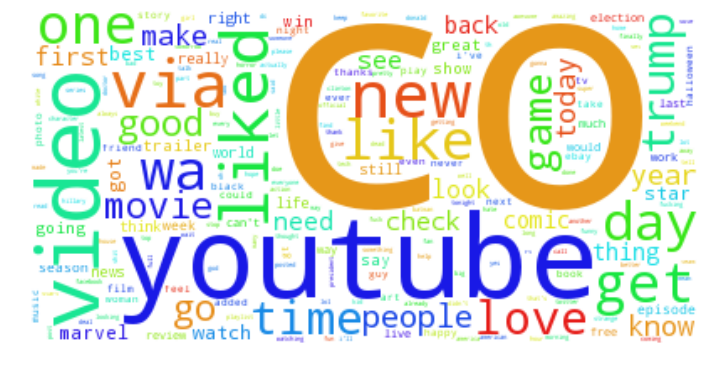

In [44]:
list_feq = vs.sum(axis = 0)
list_feq = list_feq.tolist()[0]
tokens_feq = zip(v.get_feature_names(), list_feq)
draw_tag_cloud(v,vs)